<a href="https://colab.research.google.com/github/tamnguyen2189/Sales_Dashboard/blob/main/Sales_Dashboard_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SALES DASHBOARD**

# Import Libraries and Load Data

**Import Libraries**

In [1]:
# Import libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Load Data**

In [2]:
# Connect gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data
frame_a = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sales_Data/Sale_Q1_2021.csv')
frame_b = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sales_Data/Sale_Q2_2021.csv')

df = pd.concat([frame_a,frame_b],axis=0, ignore_index=True)

In [ ]:
# Load data
# df = pd.read_csv('/content/drive/MyDrive/Sale.csv', encoding='ISO-8859-1')


# Overview Data

In [17]:
df.head(5)

,product_name,date,category,quantity,price,cost,total_cost,revenue,profit
0,Dalgona Presso Latte (size M),1-2021,Presso,94,55000,10001,940094,5170000,4229906
1,Sua Da,1-2021,Presso,51,25000,5190,264690,1275000,1010310
2,Bac Xiu,1-2021,Presso,44,25000,6265,275660,1100000,824340
3,Matcha Latte [Size M],1-2021,Non- Presso,79,50000,7048,556792,3950000,3393208
4,Dalgona Presso Latte,1-2021,Presso,43,45000,7677,330111,1935000,1604889


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  376 non-null    object
 1   date          376 non-null    object
 2   category      376 non-null    object
 3   quantity      376 non-null    int64 
 4   price         376 non-null    int64 
 5   cost          376 non-null    int64 
 6   total_cost    376 non-null    int64 
 7   revenue       376 non-null    int64 
 8   profit        376 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 26.6+ KB


In [19]:
df.describe()

,quantity,price,cost,total_cost,revenue,profit
count,376.000000,376.000000,376.000000,3.760000e+02,3.760000e+02,3.760000e+02
mean,18.255319,45250.000000,11013.029255,1.882353e+05,7.808271e+05,5.925918e+05
std,20.761342,14880.188171,8846.323274,2.331231e+05,9.063507e+05,7.143040e+05
min,1.000000,5000.000000,2500.000000,2.500000e+03,1.000000e+04,-2.475200e+05
25%,4.000000,40000.000000,7048.000000,3.468800e+04,1.717500e+05,1.189290e+05
50%,11.000000,45000.000000,9750.000000,1.057000e+05,4.675000e+05,3.372460e+05
75%,25.000000,55000.000000,12357.000000,2.573262e+05,1.016250e+06,7.783800e+05
max,112.000000,145000.000000,105000.000000,1.432224e+06,5.170000e+06,4.229906e+06


In [20]:
df.isnull().sum()

product_name    0
date            0
category        0
quantity        0
price           0
cost            0
total_cost      0
revenue         0
profit          0
dtype: int64

# Explore Data

**Quantity and Name of Products**

In [21]:
# How many drinks are there? What are they?
df['product_name'].unique()

array(['Dalgona Presso Latte (size M)', 'Sua Da', 'Bac Xiu',
       'Matcha Latte [Size M]', 'Dalgona Presso Latte', 'Banana dalgona',
       'Almond Latte', 'Tra vai mo muoi', 'Honey Orange Cold Brew',
       'Bac Xiu [Size M]', 'Tra vai mo muoi [Size M]',
       'Lychee Kombucha [Size M]', 'Banana dalgona [Size M]',
       'Sua Da [Size M]', 'Matcha Latte', 'Almond Coconut Latte',
       'Matcha Dalgona', 'Salted Kumquat Cold Brew [Size M]',
       'Lychee Kombucha', 'Cinnamon coconut latte',
       'Biscotti (Size S - 90gr)', 'Tra sa vai',
       'Combo Kombucha & 50gr Choco Crinkles', 'Matcha Dalgona [Size M]',
       'Oolong full leaf with almond milk tea', 'Choco Crinkles (80gr)',
       'Latte [Size M]', 'Caramel Macchiato', 'Kumquat Soda [Size M]',
       'Tra sa vai [Size M]', 'doi qua sua hat', 'Choco Crinkles (50gr)',
       'Oolong full leaf with almond milk tea [Size M]',
       'Matcha Presso Fusion [Size M]', 'Latte',
       'Salted Kumquat Cold Brew', 'Kumquat Soda', 'M

In [23]:
df['product_name'].nunique()

61

<Figure size 1440x1440 with 0 Axes>

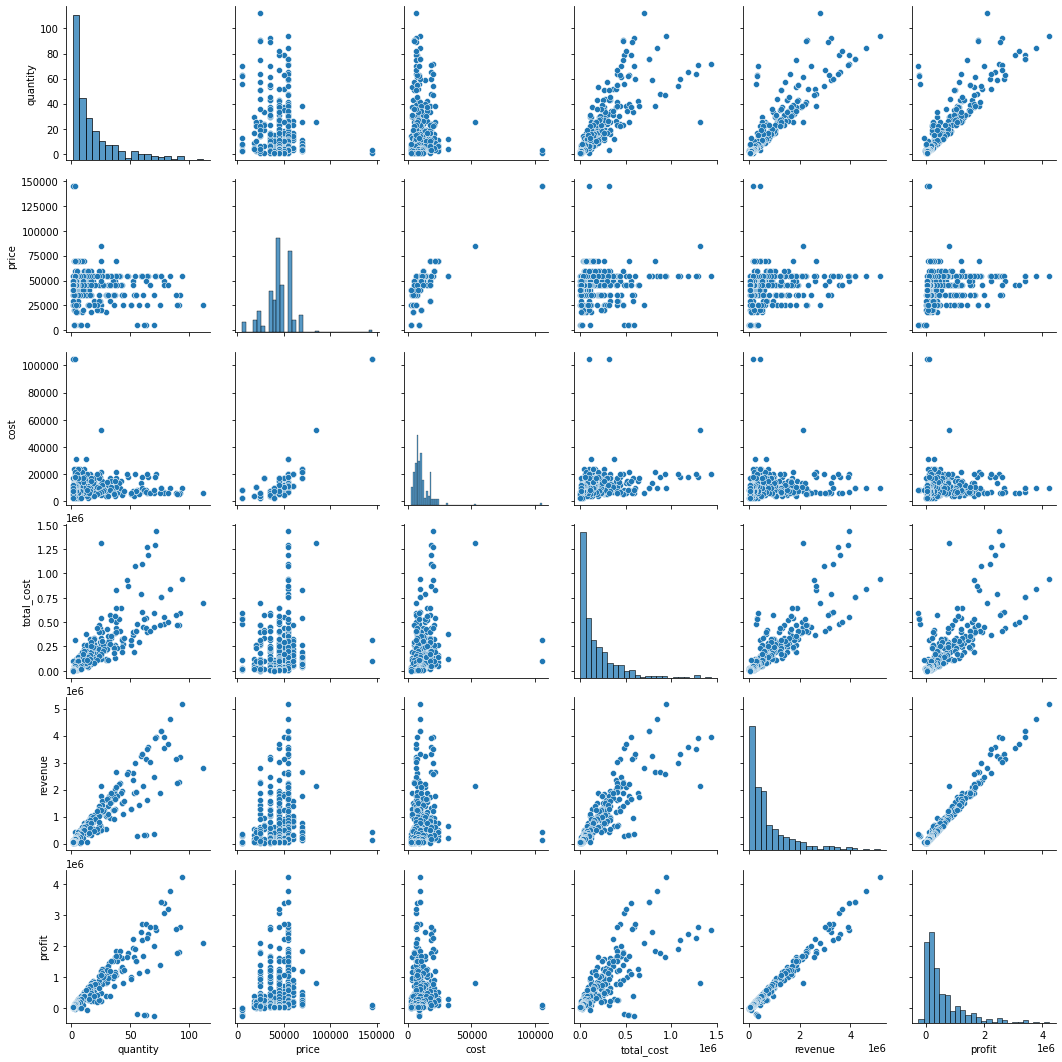

In [30]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

**Sum of revenue group by Date & Product**

In [5]:
# Sum of revenue group by Date & Product
df_revenue = df.groupby(['date','product_name'])[['total_cost','revenue','profit','quantity']].sum().reset_index()
df_revenue_monthly = df_revenue.groupby('date')[['profit','quantity']].sum().reset_index()

In [35]:
df_revenue.sample(5)

,date,product_name,total_cost,revenue,profit,quantity
325,7-2021,Banana dalgona (size M),200706,605000,404294,11
2,1-2021,Americano,5000,50000,45000,2
209,5-2021,Almond Coconut Latte,155718,450000,294282,9
330,7-2021,Caramel Macchiato (size M),74004,385000,310996,7
298,6-2021,Matcha Dalgona [Size M],303160,1430000,1126840,26


In [29]:
df_revenue_monthly

,date,profit,quantity
0,1-2021,27872227,840
1,2-2021,16442119,494
2,3-2021,45735707,1407
3,4-2021,39175944,1230
4,5-2021,44495091,1391
5,6-2021,36624305,1118
6,7-2021,12469129,384


## The Distribution of Revenue in Million

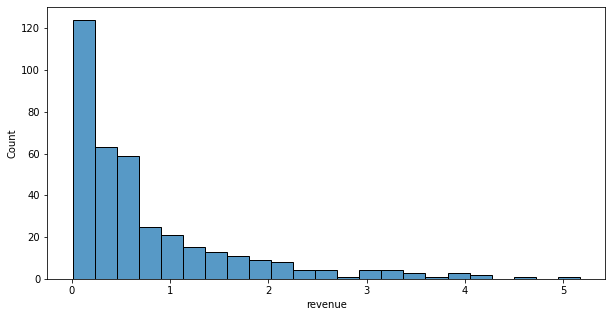

In [34]:
# The Distribution of Revenue in Million
plt.figure(figsize=(10,5))
sns.histplot(df['revenue']/1e6)
plt.show()

## Revenue in 2021

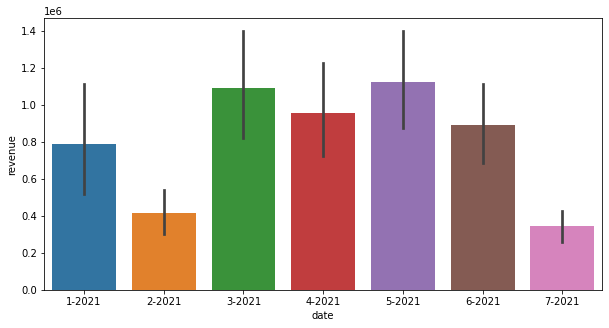

In [32]:
df_revenue_monthly = df_revenue.groupby('date')[['revenue','quantity']].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=df_revenue, x='date',y='revenue')
plt.show()

## Drink Category Sales

In [42]:
df_drink = df_revenue[df_revenue['product_name']=='Almond Latte']
df_melt = df_drink.melt(id_vars=['date'], value_vars=['total_cost','revenue','profit'])

In [46]:
df_drink

,date,product_name,total_cost,revenue,profit,quantity
1,1-2021,Almond Latte,735902,1935000,1199098,43
49,2-2021,Almond Latte,290938,765000,474062,17
102,3-2021,Almond Latte,256710,675000,418290,15
157,4-2021,Almond Latte,205368,540000,334632,12
211,5-2021,Almond Latte,290938,765000,474062,17
263,6-2021,Almond Latte,325166,855000,529834,19
317,7-2021,Almond Latte,102684,270000,167316,6


Text(0.5, 1.0, 'Total Cost')

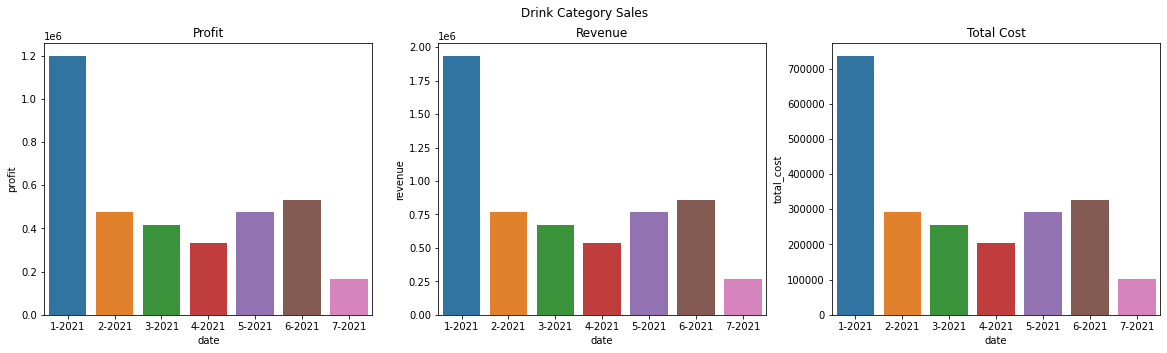

In [51]:
plt.figure(figsize=(20,5))
plt.suptitle('Drink Category Sales')

plt.subplot(131)
sns.barplot(data=df_drink, x='date',y='profit')
plt.title('Profit')

plt.subplot(132)
sns.barplot(data=df_drink, x='date',y='revenue')
plt.title('Revenue')

plt.subplot(133)
sns.barplot(data=df_drink, x='date',y='total_cost')
plt.title('Total Cost')

## Monthly Sales

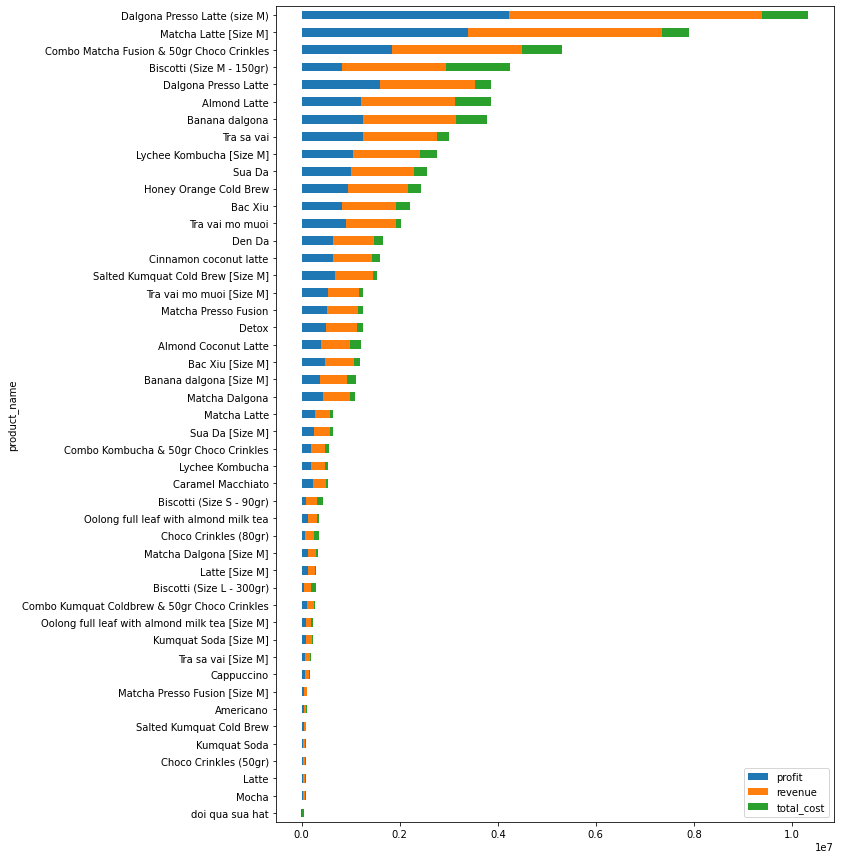

In [27]:
# Monthly Sales in January 2021
plot_data=df_revenue[df_revenue['date']=='1-2021'].sort_values('revenue',ascending=True)
plot_data.plot(kind='barh', x='product_name', y=['profit','revenue','total_cost'], stacked=True, figsize=(10,15))

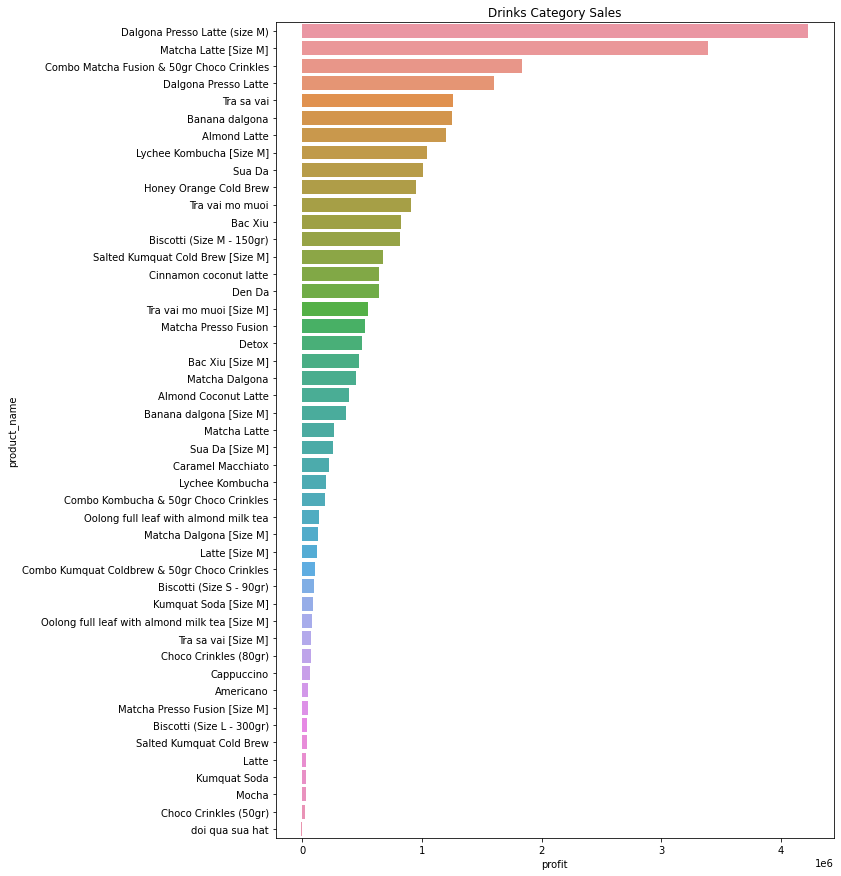

In [29]:
plot_data=df_revenue[df_revenue['date']=='1-2021'].sort_values('profit',ascending=False)
plt.figure(figsize=(10,15))
plt.title('Drinks Category Sales')
sns.barplot(data=plot_data, y='product_name',x='profit')
plt.show()

**Top 10 best seller**

In [36]:
df_product = df_revenue.groupby('product_name')[['revenue','quantity']].sum().reset_index()
top_ten = df_product.sort_values(['revenue','quantity'], ascending=False).head(10)
top_ten

,product_name,revenue,quantity
27,Dalgona Presso Latte (size M),22880000,416
43,Matcha Latte [Size M],15000000,300
3,Almond Latte (size M),14575000,265
10,Banana dalgona (size M),14520000,264
59,Tra vai mo muoi [Size M],13725000,305
54,Sua Da [Size M],11305000,323
39,Lychee Kombucha [Size M],10725000,195
33,Honey Orange Cold Brew (size M),9515000,173
6,Bac Xiu,9175000,367
53,Sua Da,9025000,361


In [ ]:
# df['date'] = pd.to_datetime(df['date'], format= '%Y%m')